<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/Handling_the__missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/data_science_job.csv')
df.head()
df.shape

(19158, 13)

In [ ]:
df.isnull().sum()


,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9585,0.550,Full time course,Masters,4.0,110.0
12430,0.624,Full time course,High School,6.0,16.0
18652,0.804,no_enrollment,Masters,16.0,58.0
12945,0.920,no_enrollment,Graduate,2.0,98.0
554,0.920,no_enrollment,Graduate,20.0,56.0


In [ ]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [ ]:
new_df=df[cols].dropna()


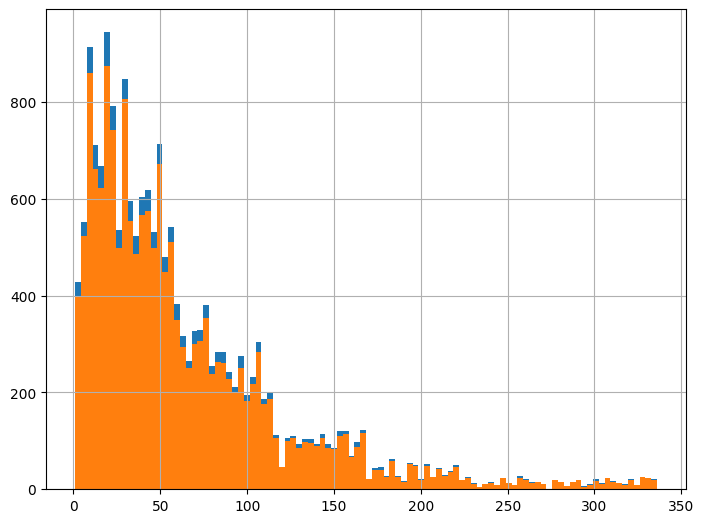

In [ ]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
df['training_hours'].hist(bins=100,ax=ax)
new_df['training_hours'].hist(bins=100,ax=ax)
plt.show()

#Handling the numerical data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dd=pd.read_csv('/content/titanic_toy.csv')
dd.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
x=dd.iloc[:,0:3]
y=dd.iloc[:,3:4]
y.head()


,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer2=SimpleImputer(missing_values=np.nan,strategy='median')

In [ ]:
from sklearn.compose import ColumnTransformer
trf1=ColumnTransformer([
    ('first',imputer1,['Age']),
    ('second',imputer2,['Fare'])]
,remainder='passthrough')


In [ ]:
trf1.fit(x_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('first', SimpleImputer(), ['Age']),
                                ('second', SimpleImputer(strategy='median'),
                                 ['Fare'])])

In [ ]:
trf1.named_transformers_['first'].statistics_


array([29.74518389])

In [ ]:
x_train=trf1.transform(x_train)
x_test=trf1.transform(x_test)